In [1]:
import csv
import numpy as np
import pandas as pd
import torch
import transformers as ppb
import nltk

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
sentences = []
for i in range(0,len(train['id'])):
    x=''
    y=''
    if(train['keyword'][i]==train['keyword'][i]):
        x = train['keyword'][i].replace("%20"," ")
    if(train['location'][i]==train['location'][i]):
        y = train['location'][i]
    sentence = x + ' <EOS> ' + y + ' <EOS> ' + train['text'][i] + ' <EOS>'
    sentences += [sentence]

In [4]:
print(sentences[0:5])

[' <EOS>  <EOS> Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all <EOS>', ' <EOS>  <EOS> Forest fire near La Ronge Sask. Canada <EOS>', " <EOS>  <EOS> All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected <EOS>", ' <EOS>  <EOS> 13,000 people receive #wildfires evacuation orders in California  <EOS>', ' <EOS>  <EOS> Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  <EOS>']


In [5]:
y_train = []
for i in range(0,len(train['id'])):
    y_train += [[train['target'][i]]]
y_train = np.array(y_train)
print(y_train)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
# Model configuration
additional_metrics = ['accuracy']
batch_size = 500
embedding_output_dims = 15
loss_function = BinaryCrossentropy()
max_sequence_length = 40
num_distinct_words = 1000
number_of_epochs = 15
optimizer = Adam()
validation_split = 0.10
verbosity_mode = 1

In [9]:
tokenizer = Tokenizer(num_words=num_distinct_words, lower= 1, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [10]:
print(word_index)

{'<OOV>': 1, 'eos': 2, 'co': 3, 't': 4, 'http': 5, 'the': 6, 'a': 7, 'in': 8, 'to': 9, 'of': 10, 'and': 11, 'i': 12, 'is': 13, 'on': 14, 'for': 15, 'you': 16, 'my': 17, 'with': 18, 'it': 19, 'that': 20, 'at': 21, 'by': 22, 'this': 23, 'new': 24, 'from': 25, 'https': 26, 'be': 27, 'are': 28, 'up': 29, 'was': 30, 'have': 31, 'fire': 32, 'like': 33, 'amp': 34, 'me': 35, 'as': 36, 'but': 37, 'just': 38, 'so': 39, 'not': 40, 'your': 41, 'emergency': 42, 'usa': 43, 'out': 44, 'no': 45, 'all': 46, 'will': 47, 'after': 48, 'disaster': 49, 'an': 50, 'has': 51, "i'm": 52, 'when': 53, 'if': 54, 'body': 55, 'we': 56, 'get': 57, '2': 58, 'via': 59, 'now': 60, 'burning': 61, 'storm': 62, 'or': 63, 'more': 64, 'buildings': 65, 'about': 66, 'suicide': 67, 'news': 68, 'they': 69, 'california': 70, 'he': 71, 'people': 72, 'what': 73, 'one': 74, 'how': 75, 'been': 76, 'fires': 77, 'over': 78, 'who': 79, 'police': 80, "it's": 81, 'into': 82, "don't": 83, 'nuclear': 84, 'bomb': 85, 'do': 86, 'ca': 87, "'":

In [11]:
sequences = tokenizer.texts_to_sequences(sentences)
print(max([len(x) for x in sequences]))

41


In [12]:
test = pd.read_csv('test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [13]:
test_sentences = []
for i in range(0,len(test['id'])):
    x=''
    y=''
    if(test['keyword'][i]==test['keyword'][i]):
        x = test['keyword'][i].replace("%20"," ")
    if(test['location'][i]==test['location'][i]):
        y = test['location'][i]
    sentence = x + ' <EOS> ' + y + ' <EOS> ' + train['text'][i] + ' <EOS>'
    test_sentences += [sentence]

In [14]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
print(test_sequences)

[[2, 2, 138, 1, 28, 6, 941, 10, 23, 171, 172, 1, 1, 98, 46, 2], [2, 2, 117, 32, 405, 552, 1, 1, 148, 2], [2, 2, 46, 1, 1, 9, 1, 8, 1, 28, 169, 1, 22, 1, 45, 597, 184, 63, 1, 8, 766, 1, 28, 1, 2], [2, 2, 875, 1, 72, 1, 1, 184, 1, 8, 70, 2], [2, 2, 38, 124, 1, 23, 528, 25, 1, 1, 36, 202, 25, 1, 1, 82, 7, 332, 2], [2, 2, 1, 567, 70, 1, 818, 979, 8, 767, 1, 675, 9, 846, 400, 32, 1, 1, 2], [2, 2, 161, 49, 980, 517, 1, 942, 175, 10, 1, 8, 1, 488, 1, 1, 2], [2, 2, 52, 14, 429, 10, 6, 1, 11, 12, 90, 133, 7, 32, 8, 6, 1, 2], [2, 2, 579, 50, 42, 184, 1, 60, 8, 6, 676, 943, 6, 739, 2], [2, 2, 52, 1, 20, 6, 302, 13, 469, 9, 138, 376, 2], [2, 2, 700, 72, 740, 25, 6, 209, 333, 39, 662, 2], [2, 2, 981, 188, 1, 13, 447, 1, 1, 792, 7, 819, 12, 315, 8, 188, 1, 73, 278, 12, 533, 86, 73, 278, 12, 533, 86, 1, 175, 2], [2, 2, 1, 175, 518, 1, 1, 718, 63, 1, 719, 558, 768, 1, 2], [2, 2, 161, 8, 1, 1, 56, 1, 1, 2], [2, 2, 149, 9, 332, 598, 14, 1, 8, 1, 158, 95, 541, 2], [391, 2, 106, 2, 820, 29, 129, 2], [391,

In [15]:
padded = pad_sequences(sequences, padding='pre',maxlen =max_sequence_length, truncating = 'post')
print(padded.shape)
test_padded = pad_sequences(test_sequences, padding='pre',maxlen =max_sequence_length, truncating = 'post')
print(test_padded.shape)

(7613, 40)
(3263, 40)


In [16]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [17]:
padded_split_test = padded[6000:]
y_split_test = y_train[6000:]
padded = padded[:6000]
y_train = y_train[:6000]

In [18]:
# Disable eager execution
tf.compat.v1.disable_eager_execution()

In [19]:
# Define the Keras model
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [20]:
# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [21]:
# Give a summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 15)            15000     
_________________________________________________________________
lstm (LSTM)                  (None, 10)                1040      
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 16,051
Trainable params: 16,051
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Train the model
history = model.fit(padded, y_train, batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

Train on 5400 samples, validate on 600 samples
Epoch 1/15
5400/5400 [==============================] - 0s 65us/sample - loss: 0.6892 - accuracy: 0.5611 - val_loss: 0.6815 - val_accuracy: 0.5900
Epoch 2/15
5400/5400 [==============================] - 0s 53us/sample - loss: 0.6780 - accuracy: 0.5794 - val_loss: 0.6688 - val_accuracy: 0.5900
Epoch 3/15
5400/5400 [==============================] - 0s 47us/sample - loss: 0.6664 - accuracy: 0.5794 - val_loss: 0.6548 - val_accuracy: 0.5900
Epoch 4/15
5400/5400 [==============================] - 0s 47us/sample - loss: 0.6510 - accuracy: 0.5796 - val_loss: 0.6337 - val_accuracy: 0.5900
Epoch 5/15
5400/5400 [==============================] - 0s 47us/sample - loss: 0.6203 - accuracy: 0.6370 - val_loss: 0.6015 - val_accuracy: 0.6917
Epoch 6/15
5400/5400 [==============================] - 0s 45us/sample - loss: 0.5784 - accuracy: 0.7235 - val_loss: 0.5711 - val_accuracy: 0.6983
Epoch 7/15
5400/5400 [==============================] - 0s 42us/sample 

In [23]:
# Test the model after training
test_results = model.evaluate(padded_split_test, y_split_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 0.5571294599117438 - Accuracy: 72.4116563796997%


In [24]:
import matplotlib.pyplot as plt

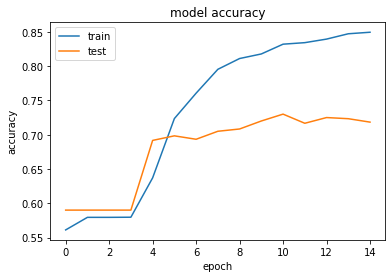

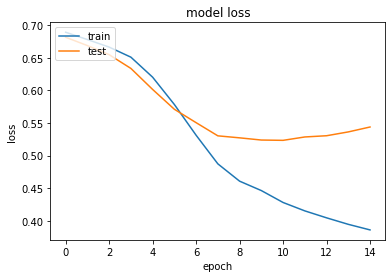

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()